In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import string # special operations on strings
import spacy # language models
import re
from wordcloud import WordCloud

In [ ]:
## command through anaconda command prompt
!python -m spacy download en

2023-04-29 06:48:41.171187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 114.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#Problem-1)

Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

#Solution:

In [ ]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [ ]:
pd.set_option('display.max_rows', 10)
elon_musk=pd.read_csv('Elon_musk.csv',index_col=0,encoding='ISO-8859-1')
elon_musk

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


##Basic & EDA

In [ ]:
elon_musk.shape

(1999, 1)

In [ ]:
elon_musk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 1 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [ ]:
elon_musk.isna().sum()

Text    0
dtype: int64

*  There is no null values in the dataset.

In [ ]:
elon_musk.duplicated().value_counts()

False    1997
True        2
dtype: int64

In [ ]:
elon_musk[elon_musk.duplicated()]

,Text
325,The most entertaining outcome is the most likely
656,@westcoastbill Indeed


In [ ]:
#removing duplicate records
elon_musk_cln=elon_musk.drop_duplicates().reset_index()
elon_musk_cln=elon_musk_cln.drop('index',axis=1)
elon_musk_cln

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
elon_musk_cln.value_counts()

Text                                                                                                                                            
.@TheBabylonBee is savage <U+0001F923><U+0001F923>                                                                                                  1
@picot_john @CyberpunkGame Its a good to great game imo, but improving what may seem like mere surface detail woul
 https://t.co/zm0SZ9CbZg        1
@renarddemoscou @BillGates Sorry to hear this. What can we do to help?                                                                              1
@reganlovetesla @RenataKonkoly @SpaceNews_Inc Enough already on my plate &amp; Teslas. Maybe one day will do a prototy
 https://t.co/tGPWEJ7WQA    1
@redmercy Yes                                                                                                                                       1
                                                                                                         

*  Since we have only one feature and we removed duplicate observations, there will be only unique observations in the dataset.

##Text cleaning

In [ ]:
elon_musk_cln.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\']','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  text=re.sub("  ",'',text)
  return text

clean=lambda x:clean_text(x)

In [ ]:
elon_musk_cln["Text"] = elon_musk_cln["Text"].apply(clean_text) # Clean The Text
elon_musk_cln

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1992,flcnhvy true it sounds so surreal but the nega...
1993,ppathole make sure to read ur terms amp condit...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb and dumber is


In [ ]:
#word frequency
#top 20
freq=pd.Series(''.join(elon_musk_cln['Text']).split()).value_counts()[:25]
freq

the               473
to                399
is                352
a                 351
of                312
                 ... 
are                99
erdayastronaut     98
at                 93
you                85
and                84
Length: 25, dtype: int64

In [ ]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
elon_musk_cln['Text']=elon_musk_cln['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
elon_musk_cln

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1992,flcnhvy true sounds surreal negative propagand...
1993,ppathole make sure read ur terms amp condition...
1994,teslagong ppathole samwise gamgee
1995,ppathole altho dumb dumber


ValueError: ignored

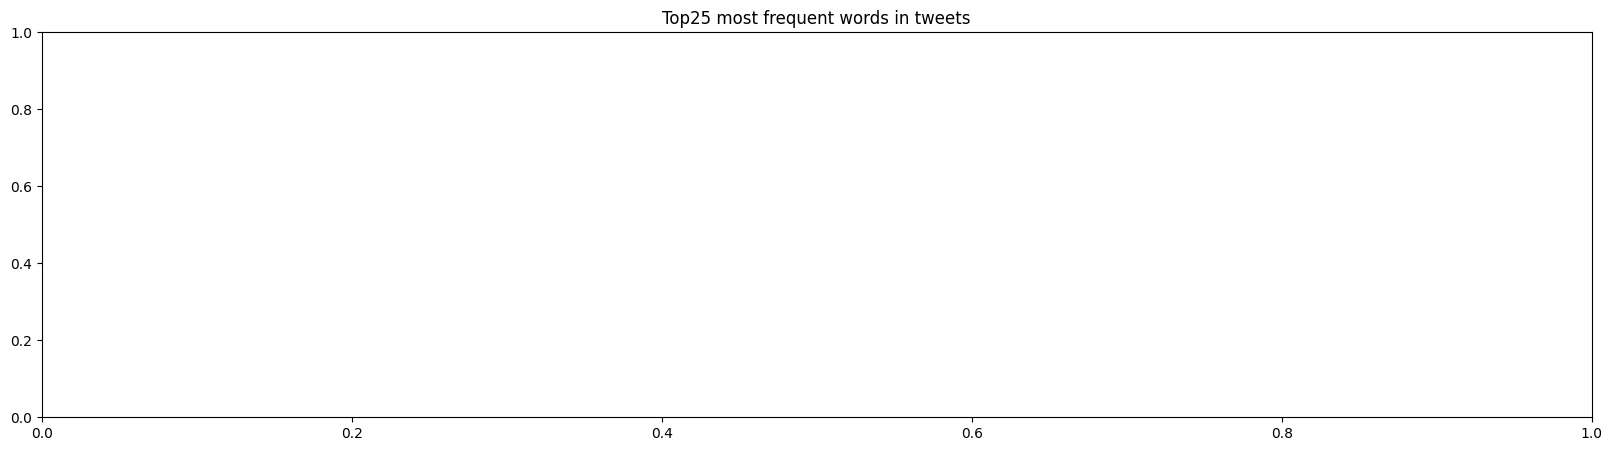

In [ ]:
#word frequency after removal of stopwords,top 25
freq_sw=pd.Series(' '.join(elon_musk_cln['Text']).split()).value_counts()[:25]
freq_sw
freq_swdf=pd.DataFrame(freq_sw).reset_index()
freq_swdf.rename(columns={'index':'word',0:'frequency'},inplace=True)
plt.figure(figsize=(20,5))
plt.title('Top25 most frequent words in tweets')
sns.barplot('word')
sns.barplot('frequency')
sns.barplot (data=freq_swdf)
plt.xticks(rotation=45)

In [ ]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer=CountVectorizer(min_df=1,max_df=5)
X=vectorizer.fit_transform(elon_musk_cln["Text"])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names(),
                           'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

AttributeError: ignored

In [ ]:
word_freq_df.head(25)

In [ ]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec=vectorizer.fit_transform(elon_musk_cln['Text'])
names_features=vectorizer.get_feature_names()
dense=doc_vec.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=names_features)

In [ ]:
df

##N-gram

In [ ]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top2_words=get_top_n2_words(elon_musk_cln['Text'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [ ]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top3_words=get_top_n3_words(elon_musk_cln['Text'],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

In [ ]:
#Tri-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Tri-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Tri-gram"])
plt.show()

NameError: ignored

## WordCloud

In [ ]:
string_Total=" ".join(elon_musk_cln['Text'])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)

## Part of speech tagging

In [ ]:
elon_musk_cln

In [ ]:
elon_musk_sen=elon_musk_cln.copy()
elon_musk_sen=[x.strip() for x in elon_musk_sen.Text]# strip for removing lead n tail chars/spaces
elon_musk_sen=[x for x in elon_musk_sen if x]
elon_musk_sen[0:25]

In [ ]:
## part of speech tagging 
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=elon_musk_sen[21]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

##Sentence Scoring

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

In [ ]:
tweet = [x.strip() for x in elon_musk_cln.Text] # remove both the leading and the trailing characters

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
# Joining the list into one string/text
tweets_text = ' '.join(tweet)
len(tweets_text)

In [ ]:
#Tokenizing
from nltk import tokenize
sentences=tokenize.sent_tokenize(" ".join(tweet))
sentences

In [ ]:
#word scores
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

In [ ]:
#custom function : score each word in a sentence in lemmatise form,
#but calculated the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'good')

In [ ]:
elon_musk_cln['sentiment_value']=elon_musk_cln['Text'].apply(calculate_sentiment)

In [ ]:
#word count
elon_musk_cln['word_count']=elon_musk_cln['Text'].str.split().apply(len)
elon_musk_cln['word_count'].head(25)

In [ ]:
elon_musk_cln.sort_values(by='sentiment_value').tail(10)

In [ ]:
elon_musk_cln.sort_values(by='sentiment_value').head(10)

In [ ]:
#sentiment score of the whole review
elon_musk_cln['sentiment_value'].describe()

In [ ]:
# negative sentiment score of the whole review
elon_musk_cln[elon_musk_cln['sentiment_value']<0]

In [ ]:
elon_musk_cln[elon_musk_cln['sentiment_value']==0]

In [ ]:
elon_musk_cln[elon_musk_cln['sentiment_value']>0]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')
sns.distplot(elon_musk_cln['sentiment_value'])
plt.show()

In [ ]:
elontweets_line=elon_musk_cln.copy()
elontweets_line['index']=range(0,len(elontweets_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=elontweets_line)

In [ ]:
elontweets_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

##Subjectivity and Polarity

In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [ ]:
# Adding features Subjectivity & Polarity to dataset
elon_musk_cln[["subjectivity", "polarity"]] = elon_musk_cln.apply(sentiment_analysis, axis=1)
elon_musk_cln.head(25)


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
elon_tweets=elon_musk_cln.copy()
elon_tweets["tweet_kind"] = elon_tweets["polarity"].apply(analysis)
elon_tweets

In [ ]:
elon_tweets.describe()

In [ ]:
#Negative tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Negative','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Negative tweets")
plt.axis('off')
plt.show()

In [ ]:
#Neutral tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Neutral','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral tweets")
plt.axis('off')
plt.show()

In [ ]:
#positive tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(elon_tweets.loc[elon_tweets['tweet_kind']=='Positive','Text'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in positive tweets")
plt.axis('off')
plt.show()

# Conclusion:

In [ ]:
elon_tweets['tweet_kind'].value_counts()

In [ ]:
sns.countplot(elon_tweets['tweet_kind']).set_title("Elon musk Tweets Category")
plt.show()

*  There are more neutral reviews than the positive and negative reviews

#Problem-2)

*  Extract reviews of any product from ecommerce website like amazon

*  Perform emotion mining



#Solution:

In [ ]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup
#from selenium import webdriver

## Taking TITAN WATCH reviews from amazon for performing emotion mining

In [ ]:
titan_watch=[]
for i in range (1,63):
    watch=[]
    url="https://www.amazon.in/Titan-Analog-Blue-Dial-Watch-1766SL03/product-reviews/B07DD2KBXV/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        watch.append(reviews[i].text)
    titan_watch=titan_watch+watch   

In [ ]:
len(titan_watch)

In [ ]:
titan_watch

##Basic,EDA and Text cleanig

In [ ]:
titan=pd.DataFrame.from_dict({"review":titan_watch})
pd.set_option('max_colwidth',500)

titan

In [ ]:
titan.shape

In [ ]:
titan['review'].isnull().sum()

In [ ]:
titan.duplicated().value_counts()

In [ ]:
def deemojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
#regular expression
import re 
import string

def clean_text(text):
  text=text.lower()
  text=deemojify(text)
  text=re.sub('\[.*?-,\]','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub("[0-9" "]+"," ",text)
  text=re.sub('[‘’“”…]','',text)
  return text

clean=lambda x:clean_text(x)

In [ ]:
titan_cln=titan.copy()
titan_cln['review']=titan_cln.review.apply(clean)
titan_cln

In [ ]:
#removing stop words
titan_nosw=titan_cln.copy()
titan_nosw['review']=titan_nosw['review'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
titan_nosw.head()

In [ ]:
#word frequency
#top 20
freq1=pd.Series(''.join(titan_nosw['review']).split()).value_counts()[:25]
freq1

In [ ]:
#count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer1=CountVectorizer(min_df=1,max_df=5)
X1=vectorizer1.fit_transform(titan_nosw["review"])
word_freq_df1=pd.DataFrame({'term':vectorizer1.get_feature_names(),
                           'occurrences':np.asarray(X1.sum(axis=0)).ravel().tolist()})
word_freq_df1['frequency']=word_freq_df1['occurrences']/np.sum(word_freq_df1['occurrences'])

In [ ]:
word_freq_df1.head(25)

In [ ]:
#TFIDF -term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)# 1000 words
doc_vec2=vectorizer2.fit_transform(titan_nosw['review'])
names_features2=vectorizer2.get_feature_names()
dense2=doc_vec2.todense()
denselist2=dense2.tolist()
df2=pd.DataFrame(denselist2,columns=names_features2)

In [ ]:
df2

## N-gram

In [ ]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus) # for tri-gram=(3,3)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n] 

In [ ]:
top2_words=get_top_n2_words(titan['review'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram',"Freq"]
top2_df.head(50)

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])
plt.show()

In [ ]:
#Tri-gram
def get_top_n3_words(corpus,n=None):
  vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
  bag_of_words=vec1.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    
  return words_freq[:n]  

In [ ]:
top3_words=get_top_n3_words(titan_nosw['review'],n=200) #top 200
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-gram',"Freq"]
top3_df

In [ ]:
#Tri-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(20,7))
plot=sns.barplot(x=top20_bigram['Tri-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Tri-gram"])
plt.show()

## wordcloud

In [ ]:
string_Total=" ".join(titan_nosw['review'])

#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_stw=WordCloud(background_color= 'white',width = 2800,height = 2500).generate(string_Total)
plt.imshow(wordcloud_stw)

## Part of speech tagging

In [ ]:
titan_sen=titan_nosw.copy()
titan_sen=[x.strip() for x in titan_sen.review]# strip for removing lead n tail chars/spaces
titan_sen=[x for x in titan_sen if x]
titan_sen[0:25]

In [ ]:
## part of speech tagging 
# nlp = spacy.load('en)
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[11]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

In [ ]:
# filetring for nouns & verbs 
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=titan_sen[21]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
one_block

In [ ]:
for token in doc_block[0:20]:
  print(token,token.pos_)

In [ ]:
# filetring for nouns & verbs 
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

In [ ]:
import nltk
nltk.download('punkt')
text=" ".join(titan_nosw["review"])
text_tokens = word_tokenize(text)

In [ ]:
text_tokens[:20]

In [ ]:
len(text_tokens)

## Sentence Scoring

In [ ]:
#custom function : score each word in a sentence in lemmatise form,
#but calculated the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [ ]:
titan_nosw['sentiment_value']=titan_nosw['review'].apply(calculate_sentiment)

In [ ]:
#word count
titan_nosw['word_count']=titan_nosw['review'].str.split().apply(len)
titan_nosw['word_count'].head(25)

In [ ]:
titan_nosw.sort_values(by='sentiment_value').tail(15)

In [ ]:
titan_nosw.sort_values(by='sentiment_value').head(10)

In [ ]:
#sentiment score of the whole review
titan_nosw['sentiment_value'].describe()

In [ ]:
titan_nosw[titan_nosw['sentiment_value']<0]

In [ ]:
titan_nosw[titan_nosw['sentiment_value']>0]

In [ ]:
titan_nosw[titan_nosw['sentiment_value']==0]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')
sns.distplot(titan_nosw['sentiment_value'])
plt.show()

In [ ]:
titan_line=titan_nosw.copy()
titan_line['index']=range(0,len(titan_line))
plt.figure(figsize=(11,7))
sns.lineplot(y='sentiment_value',x='index',data=titan_line)

In [ ]:
titan_line.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')

##Subjectivity & Polarity

In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [ ]:
# Adding features Subjectivity & Polarity to dataset
titan_sbpt=titan_nosw.copy()
titan_sbpt[["subjectivity", "polarity"]] = elon_musk_cln.apply(sentiment_analysis, axis=1)
titan_sbpt.head(25)

In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
titan_sbpt["review_kind"] = titan_sbpt["polarity"].apply(analysis)
titan_sbpt

In [ ]:
titan_sbpt.describe()

In [ ]:
#Negative tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Negative','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Negative reviews")
plt.axis('off')
plt.show()

In [ ]:
#neutral tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Neutral','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral reviews")
plt.axis('off')
plt.show()

In [ ]:
#positive tweets wordcloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(titan_sbpt.loc[titan_sbpt['review_kind']=='Positive','review'].tolist()))
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.title("Most common words in Positive reviews")
plt.axis('off')
plt.show()

#Conclusion:

In [ ]:
titan_sbpt['review_kind'].value_counts()

In [ ]:
sns.countplot(titan_sbpt['review_kind']).set_title(" Titan Watch Reviews Category")
plt.show()

*  There are more neutral reviews than the positive and negative reviews.



---
<center> THANK YOU


---


